In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
d = {'name': [], 'position': []}
r = requests.get('https://www.mlb.com/stats/regular-season')
soup = BeautifulSoup(r.content, 'html.parser')
table = soup.find(class_="table-scroller-GsCM0EhI scroller")
columns = [c.get_text() for c in table.find_all('abbr')][2::2]
for i in range (len(columns)):
    d[columns[i]] = []

In [7]:
for i in range (1, 8):
  r = requests.get('https://www.mlb.com/stats/regular-season/?page=' + str(i))
  print('https://www.mlb.com/stats/regular-season/?page=' + str(i))

  soup = BeautifulSoup(r.content, 'html.parser')
  table = soup.find(class_="table-scroller-GsCM0EhI scroller")

  columns = [c.get_text() for c in table.find_all('abbr')][2::2]
  name = [r.get_text() for r in table.find_all('span', class_="short-IiSPVSQp")]
  position = [r.get_text() for r in table.find_all('div', class_="position-SAxuJGcx")]
  stat = [r.get_text() for r in table.find_all('td')]

  d['name'] += name
  d['position'] += position
  for i in range (len(columns)):
    if i > 12:
      d[columns[i]] += [float(stat[j]) for j in range(i, len(stat),len(columns))]
    elif i > 0:
      d[columns[i]] += [int(stat[j]) for j in range(i, len(stat),len(columns))]
    else:
      d[columns[i]] += [stat[j] for j in range(i, len(stat),len(columns))]

https://www.mlb.com/stats/regular-season/?page=1
https://www.mlb.com/stats/regular-season/?page=2
https://www.mlb.com/stats/regular-season/?page=3
https://www.mlb.com/stats/regular-season/?page=4
https://www.mlb.com/stats/regular-season/?page=5
https://www.mlb.com/stats/regular-season/?page=6
https://www.mlb.com/stats/regular-season/?page=7


In [8]:
df = pd.DataFrame(d)
df

,name,position,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,A Judge,CF,NYY,158,559,122,180,36,1,58,144,133,171,10,0,0.322,0.458,0.701,1.159
1,S Ohtani,DH,LAD,159,636,134,197,38,7,54,130,81,162,59,4,0.310,0.390,0.646,1.036
2,J Soto,RF,NYY,157,576,128,166,31,4,41,109,129,119,7,4,0.288,0.419,0.569,0.988
3,B Witt Jr.,SS,KC,161,636,125,211,45,11,32,109,57,106,31,12,0.332,0.389,0.588,0.977
4,Y Alvarez,DH,HOU,147,552,88,170,34,2,35,86,69,95,6,0,0.308,0.392,0.567,0.959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,A Gimenez,2B,CLE,152,583,64,147,22,1,9,63,26,97,30,5,0.252,0.298,0.340,0.638
125,C Morel,2B,TB,152,535,56,105,11,3,21,60,61,159,8,7,0.196,0.288,0.346,0.634
126,Z Gelof,2B,OAK,138,497,60,105,20,2,17,49,38,188,25,3,0.211,0.270,0.362,0.632
127,O Arcia,SS,ATL,157,551,50,120,24,0,17,46,41,128,2,0,0.218,0.271,0.354,0.625


In [9]:
df.to_csv("players.csv")

In [ ]:
df['ISO'] = df['SLG'] - df['AVG']
df['K%'] = df['SO'] / df['AB']
df['BB%'] = df['BB'] / df['AB']

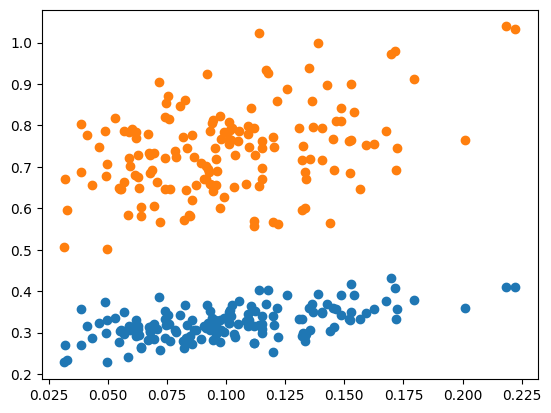

In [ ]:
plt.scatter(df['BB%'], df['OBP'])
plt.scatter(df['BB%'], df['OPS'])

<Axes: ylabel='SB'>

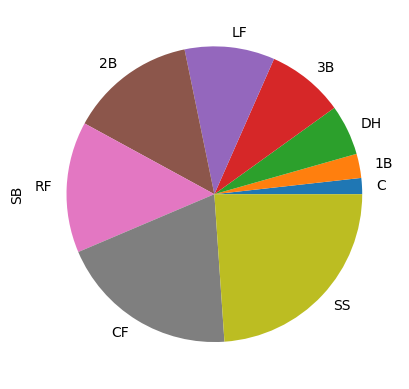

In [ ]:
df.groupby('position')['SB'].mean().sort_values().plot(kind='pie')

<Axes: xlabel='position'>

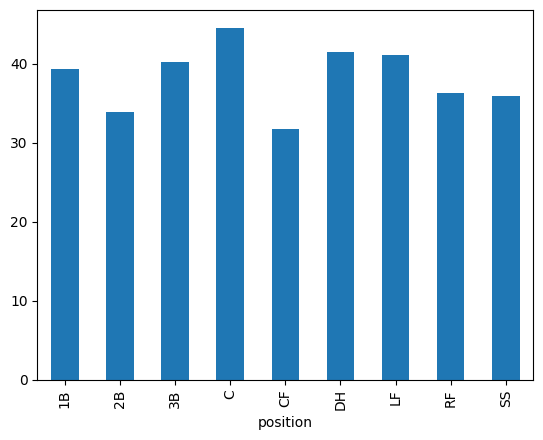

In [ ]:
df.groupby('position')['RBI'].mean().plot(kind='bar')